[[-0.91085732  0.91485036]
 [ 0.20885262  0.20251402]
 [ 0.7020047  -1.11736438]] [-0.16744762  0.45043375 -0.28298613]


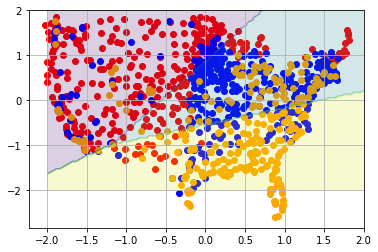

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import linear_model
import pandas as pd

data = pd.read_csv("dataCollection.csv")

number = data['USAF'].values
latitude = data['Latitude'].values
longitude = data['Longitude'].values
etr = data['Avg hourly ETR in 2005 (Wh/m^2)'].values
metstat = data['Avg hourly METSTAT in 2005 (Wh/m^2)'].values
length = number.size
classes = np.empty(length,dtype=int)

var_x = np.var(longitude)
var_y = np.var(latitude)

mean_x = np.mean(longitude)
mean_y = np.mean(latitude)

x_norm = (longitude - mean_x)/np.sqrt(var_x)
y_norm = (latitude - mean_y)/np.sqrt(var_y)

# for i in range(length):
#     if etr[i] < 320:
#         classes[i]=0
#     elif 320 < etr[i] < 340:
#         classes[i]=1
#     else:
#         classes[i]=2
for i in range(length):
    if metstat[i] < 60:
        classes[i]=0
    elif 60 <= metstat[i] < 70:
        classes[i]=1
    else:
        classes[i]=2

# get labels and features, use sepal this time
y = classes
x1 = longitude
x2 = latitude
x=np.array([x_norm, y_norm])
x=x.T
# scatter plot
colors=('r','b','orange')
for target in range(3):
  plt.scatter(x_norm[y==target],y_norm[y==target],c=colors[target])
plt.grid(1)

# train model1
log_regress = linear_model.LogisticRegression(max_iter=1000)
log_regress.fit(x,y)
# xx1, xx2 = np.meshgrid(np.linspace(-140,-60,100),np.linspace(20, 60,100))
xx1, xx2 = np.meshgrid(np.linspace(-2,2,100),np.linspace(-2, 2,100))
z=log_regress.predict(np.c_[xx1.ravel(), xx2.ravel()])
z=z.reshape(xx1.shape)

print(log_regress.coef_,log_regress.intercept_)
plt.contourf(xx1,xx2,z,alpha=.2)
